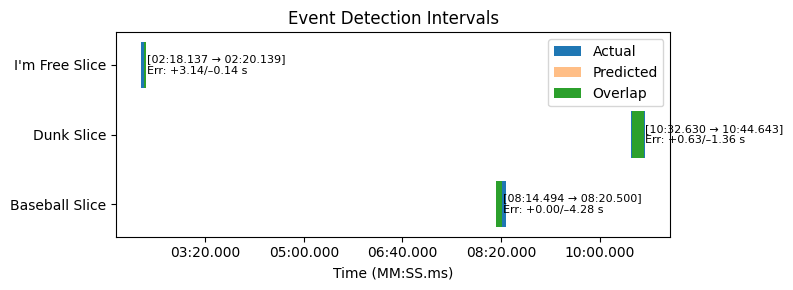

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1. A small helper to turn seconds → "MM:SS.ms"
def sec_to_timestamp(x, pos=None):
    minutes = int(x // 60)
    seconds = int(x % 60)
    milliseconds = int((x - int(x)) * 1000)
    return f"{minutes:02d}:{seconds:02d}.{milliseconds:03d}"

# 2. Your data
data = [
    {"video":"Baseball Slice", "actual_start":494.494, "actual_end":504.78,
                 "pred_start":494.494, "pred_end":500.5},
    {"video":"Dunk Slice", "actual_start": 632, "actual_end":646,
                 "pred_start": 632.631, "pred_end":644.643},
    {"video":"I'm Free Slice", "actual_start":135, "actual_end":140,
                 "pred_start":138.137, "pred_end":140.139},
]

fig, ax = plt.subplots(figsize=(8, 3))

# 3. Tell Matplotlib to use our timestamp formatter on the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(sec_to_timestamp))

bar_height = 4
yticks, ylabels = [], []
for i, d in enumerate(data):
    y = i * (bar_height + 2)
    # actual
    ax.broken_barh(
        [(d["actual_start"], d["actual_end"] - d["actual_start"])],
        (y, bar_height), facecolors="C0", label="Actual" if i==0 else ""
    )
    # predicted
    ax.broken_barh(
        [(d["pred_start"], d["pred_end"] - d["pred_start"])],
        (y, bar_height), facecolors="C1", alpha=0.5, label="Predicted" if i==0 else ""
    )
    # overlap
    ov_s = max(d["actual_start"], d["pred_start"])
    ov_e = min(d["actual_end"],   d["pred_end"])
    if ov_e > ov_s:
        ax.broken_barh(
            [(ov_s, ov_e - ov_s)],
            (y, bar_height), facecolors="C2", label="Overlap" if i==0 else ""
        )
    # annotate errors using the same formatter
    start_err = abs(d["pred_start"] - d["actual_start"])
    end_err   = abs(d["pred_end"]   - d["actual_end"])
    txt = f"[{sec_to_timestamp(d['pred_start'])} → {sec_to_timestamp(d['pred_end'])}]\n"
    txt += f"Err: +{start_err:.2f}/–{end_err:.2f} s"
    ax.text(
        d["pred_end"] + 1, y + bar_height/2,
        txt, va="center", fontsize=8
    )

    yticks.append(y + bar_height/2)
    ylabels.append(d["video"])

# 4. Final polish
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
ax.set_xlabel("Time (MM:SS.ms)")
ax.legend(loc="upper right")
ax.set_title("Event Detection Intervals")
plt.tight_layout()
plt.show()

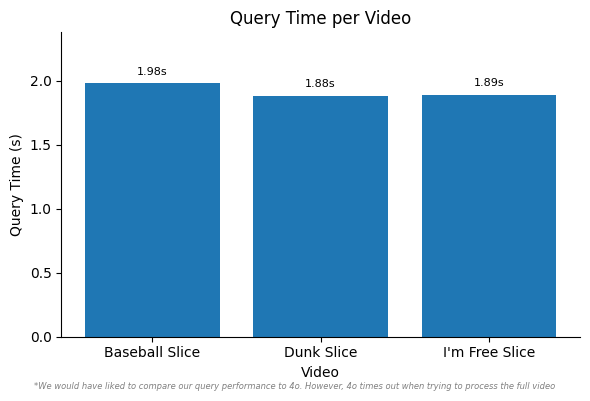

In [21]:
import matplotlib.pyplot as plt

videos     = ["Baseball Slice", "Dunk Slice", "I'm Free Slice"]
query_time = [1.98, 1.88, 1.89]        # in seconds

fig, ax = plt.subplots(figsize=(6,4))

# Draw bars
bars = ax.bar(videos, query_time, color="C0")

# Labels & title
ax.set_ylabel("Query Time (s)")
ax.set_xlabel("Video")
ax.set_title("Query Time per Video")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.margins(y=0.2)

# Annotate each bar
for bar, qt in zip(bars, query_time):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        qt + 0.05,
        f"{qt:.2f}s",
        ha="center", va="bottom", fontsize=8
    )

plt.tight_layout()

# Add a single footnote at the bottom of the figure
# Build a list of videos that timed out
note = "\n\n*We would have liked to compare our query performance to 4o. However, 4o times out when trying to process the full video"
fig.text(
    0.5,    # x-position in figure coordinates (0=left, 1=right)
    0.01,   # y-position (just above the bottom of the figure)
    note,
    ha="center", va="bottom",
    fontsize=6,
    style="italic",
    color="gray"
)

plt.show()